# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from haversine import haversine
import seaborn as sns

# Reading dataset

In [2]:
data=pd.read_csv("C:/Users/AYRUS/Desktop/nyc_taxi_trip_duration.csv")

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

#  Performing EDA

In [6]:
data['vendor_id']=data['vendor_id'].astype('category')
data['store_and_fwd_flag']=data['store_and_fwd_flag'].astype('category')

In [7]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'],format='%Y-%m-%d %H:%M:%S')

In [8]:
data['pickup_hour']=data['pickup_datetime'].dt.hour

In [9]:
data['pick_time_of_the_day']=data.pickup_hour.apply(lambda y:(y%24+4)//4).replace({1:'Late Night',
                                                                                   2:'Early Morning',
                                                                                   3:'Morning',
                                                                                   4:'Afternoon',
                                                                                   5:'Evening',
                                                                                   6:'Night'})

In [10]:
data['day_of_the_week']=data.pickup_datetime.apply(lambda x:x.day_name())

In [11]:
data['trip_duration_in_hours']=data.trip_duration.apply(lambda x: x/3600)

In [12]:
data['pickup_day_of_week']=data['pickup_datetime'].dt.dayofweek

In [13]:
condition=[data['pick_time_of_the_day']=='Late Night',
           data['pick_time_of_the_day']=='Early Morning',
           data['pick_time_of_the_day']=='Morning',
           data['pick_time_of_the_day']=='Afternoon',
           data['pick_time_of_the_day']=='Evening',
           data['pick_time_of_the_day']=='Night']

choice=[0,1,2,3,4,5]

data['pick_time_of_the_day_in_numbers']=np.select(condition,choice)

In [14]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)



In [15]:
data['total_distance'] = data.apply(lambda x: calc_distance(x), axis = 1)

In [16]:
data['speed'] = (data.total_distance/(data.trip_duration/3600))

In [17]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

In [18]:
data.drop(data[data['trip_duration']==1939736].index,inplace=True)

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

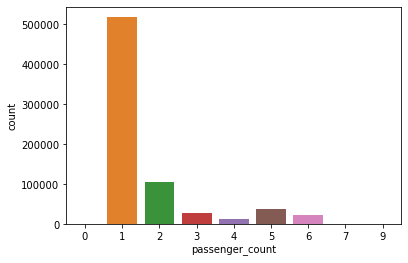

In [19]:
sns.countplot(x='passenger_count',data=data)

In [20]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [21]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [22]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [23]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pick_time_of_the_day,day_of_the_week,trip_duration_in_hours,pickup_day_of_week,pick_time_of_the_day_in_numbers,total_distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,16,Evening,Monday,0.111111,0,4,1.199074,10.791668
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,23,Night,Friday,0.305556,4,5,4.129117,13.513473
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,17,Evening,Sunday,0.454167,6,4,7.250763,15.964983
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,9,Morning,Tuesday,0.316944,1,2,2.361101,7.449573
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,6,Early Morning,Wednesday,0.235556,2,1,4.328540,18.375877


In [24]:
data=pd.get_dummies(data,columns=['store_and_fwd_flag','passenger_count','day_of_the_week','pick_time_of_the_day','vendor_id'])



In [25]:
data.head()

,id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,trip_duration_in_hours,...,day_of_the_week_Tuesday,day_of_the_week_Wednesday,pick_time_of_the_day_Afternoon,pick_time_of_the_day_Early Morning,pick_time_of_the_day_Evening,pick_time_of_the_day_Late Night,pick_time_of_the_day_Morning,pick_time_of_the_day_Night,vendor_id_1,vendor_id_2
0,id1080784,2016-02-29 16:40:21,2016-02-29 16:47:01,-73.953918,40.778873,-73.963875,40.771164,400,16,0.111111,...,0,0,0,0,1,0,0,0,0,1
1,id0889885,2016-03-11 23:35:37,2016-03-11 23:53:57,-73.988312,40.731743,-73.994751,40.694931,1100,23,0.305556,...,0,0,0,0,0,0,0,1,1,0
2,id0857912,2016-02-21 17:59:33,2016-02-21 18:26:48,-73.997314,40.721458,-73.948029,40.774918,1635,17,0.454167,...,0,0,0,0,1,0,0,0,0,1
3,id3744273,2016-01-05 09:44:31,2016-01-05 10:03:32,-73.961670,40.759720,-73.956779,40.780628,1141,9,0.316944,...,1,0,0,0,0,0,1,0,0,1
4,id0232939,2016-02-17 06:42:23,2016-02-17 06:56:31,-74.017120,40.708469,-73.988182,40.740631,848,6,0.235556,...,0,1,0,1,0,0,0,0,1,0


# Divide data into Train & Module 

In [26]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to module set
train_data= data.loc[:3*div+1,:]
module_data = data.loc[3*div+1:]

In [27]:
train_data.shape

(522516, 37)

In [28]:
module_data.shape

(206771, 37)

In [29]:
# loading module data in new_data
new_data=module_data.drop(['id','pickup_datetime','dropoff_datetime'],axis=1)

new_data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,trip_duration_in_hours,pickup_day_of_week,pick_time_of_the_day_in_numbers,total_distance,...,day_of_the_week_Tuesday,day_of_the_week_Wednesday,pick_time_of_the_day_Afternoon,pick_time_of_the_day_Early Morning,pick_time_of_the_day_Evening,pick_time_of_the_day_Late Night,pick_time_of_the_day_Morning,pick_time_of_the_day_Night,vendor_id_1,vendor_id_2
546964,-73.957359,40.785664,-73.963364,40.775875,468,15,0.130000,1,3,1.200115,...,1,0,1,0,0,0,0,0,0,1
207141,-73.863258,40.769756,-73.980888,40.764374,3388,14,0.941111,3,3,9.924377,...,0,0,1,0,0,0,0,0,1,0
637544,-73.966644,40.757729,-73.970009,40.750610,288,9,0.080000,4,2,0.840719,...,0,0,0,0,0,0,1,0,0,1
721586,-73.966293,40.767910,-73.986977,40.726765,765,22,0.212500,6,5,4.895707,...,0,0,0,0,0,0,0,1,1,0
639710,-74.005028,40.722752,-73.978699,40.740940,484,1,0.134444,0,0,3.002018,...,0,0,0,0,0,1,0,0,0,1


# Segragating variables Independent and Dependent

In [30]:
# seprating independent and dependent variables
x=new_data.drop(['trip_duration_in_hours'],axis=1)
y=new_data['trip_duration_in_hours']

x.shape , y.shape

((206771, 33), (206771,))

# scaling the data(using minmax scaler)

In [31]:
# Importing Minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
x = pd.DataFrame(x_scaled)

In [33]:
# Importing Train test split

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 42,test_size=0.02)


In [34]:
train_x.shape

(202635, 33)

In [35]:
test_x.shape

(4136, 33)

# Importing KNN regressor and Mean Absolute Error

In [36]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_absolute_error as mae

In [37]:
# Creating instance of KNN
reg = KNN(n_neighbors = 1)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MAE
test_predict = reg.predict(test_x)
k = mae(test_predict, test_y)
print('Test MAE    ', k )

Test MAE     0.03872105362131958


In [38]:
# making Elbow classifier
def Elbow(K):
  #initiating empty list
    test_mae= []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mae value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mae(tmp,test_y)
        test_mae.append(tmp)
    
    return test_mae

In [39]:
# K value 
k = range(1,15)

In [40]:
# calling above function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

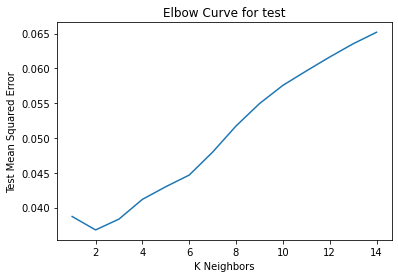

In [41]:
# plotting the curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [42]:
# Creating instance of KNN
reg = KNN(n_neighbors = 2)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating mae
test_predict = reg.predict(test_x)
k1= mae(test_predict, test_y)
print('Test MAE    ', k1 )

Test MAE     0.036796287341500096


# Loading train data 

In [43]:
new_df=train_data.drop(['id','pickup_datetime','dropoff_datetime'],axis=1)

new_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,trip_duration_in_hours,pickup_day_of_week,pick_time_of_the_day_in_numbers,total_distance,...,day_of_the_week_Tuesday,day_of_the_week_Wednesday,pick_time_of_the_day_Afternoon,pick_time_of_the_day_Early Morning,pick_time_of_the_day_Evening,pick_time_of_the_day_Late Night,pick_time_of_the_day_Morning,pick_time_of_the_day_Night,vendor_id_1,vendor_id_2
327115,-73.991814,40.744064,-73.907669,40.683575,3368,19,0.935556,2,4,9.774321,...,0,1,0,0,1,0,0,0,1,0
642546,-73.991463,40.745068,-73.973129,40.756336,517,22,0.143611,2,5,1.988731,...,0,1,0,0,0,0,0,1,1,0
500012,-73.984879,40.742359,-73.990654,40.724621,427,22,0.118611,2,5,2.031560,...,0,1,0,0,0,0,0,1,1,0
217796,-73.943489,40.787701,-73.882362,40.829941,1074,3,0.298333,4,0,6.966188,...,0,0,0,0,0,1,0,0,0,1
319765,-73.981354,40.747139,-74.003647,40.741589,445,22,0.123611,1,5,1.976883,...,1,0,0,0,0,0,0,1,0,1


# Segragating Depenent & Independent Variable

In [44]:
a=new_df.drop(['trip_duration_in_hours'],axis=1)
b=new_df['trip_duration_in_hours']

a.shape , b.shape

((522516, 33), (522516,))

In [45]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
a_scaled = scaler.fit_transform(a)

In [46]:
a = pd.DataFrame(a_scaled)

# Loading train test split function

In [47]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(a,b, random_state = 42,test_size=0.02)
train_x.shape ,  test_x.shape

((512065, 33), (10451, 33))

In [48]:
# Creating instance of KNN
reg = KNN(n_neighbors = 2)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MAE
test_predict = reg.predict(test_x)
k2 = mae(test_predict, test_y)
print('Test MAE    ', k2 )

Test MAE     0.014908182630051349


<function matplotlib.pyplot.show(close=None, block=None)>

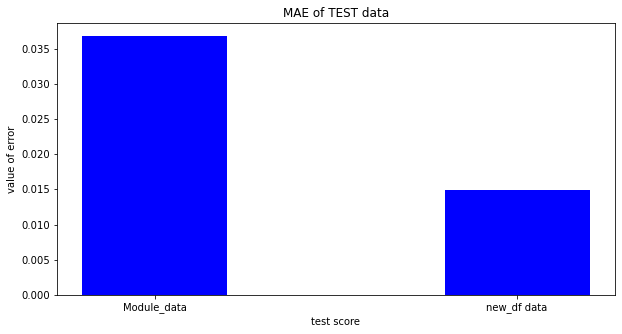

In [49]:
# creating data for bar plot
create_data={'Module_data':k1,
            'new_df data':k2}

display=list(create_data.keys())
value=list(create_data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(display, value, color ='blue',
        width = 0.4)

plt.xlabel("test score")
plt.ylabel("value of error")
plt.title("MAE of TEST data")
plt.show